### Student Information
Name: 莊安琦

Student ID: 108064532

GitHub ID: anchichuang

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[Index(['the', 'to', 'a', 'I', 'and', '', 'of', 'is', 'in', 'you', 'my', 'for',
       'that', 'on', 'it', 'be', 'me', 'have', 'so', 'this', 'with', 'not',
       'at', 'but', 'I'm', 'just', 'was', 'like', 'are', 'your'],
      dtype='object')]
      X_train
the      1583
to       1273
a        1145
I        1042
and       912
          869
of        778
is        757
in        588
you       567
my        453
for       431
that      419
on        362
it        359
be        340
me        304
have      290
so        279
this      275
with      272
not       263
at        249
but       242
I'm       238
just      238
was       219
like      216
are       213
your      209
[Index(['the', 'to', 'I', 'a', 'and', 'of', '', 'is', 'in', 'you', 'for', 'my',
       'it', 'on', 'that', 'be', 'was', 'with', 'have', 'at', 'get', 'so',
       'all', 'are', 'your', 'just', 'like', 'i', 'will', 'me'],
      dtype='object')]
      X_test
the      138
to       135
I        118
a        103
and       89


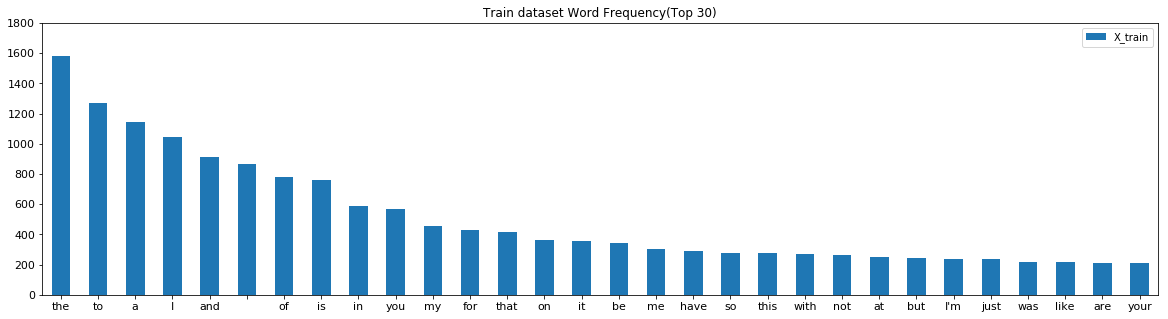

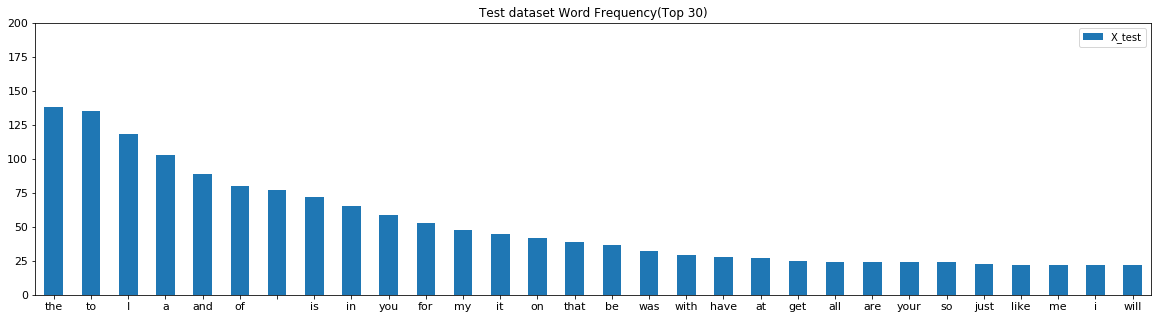

In [1]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

#train data
words_train = train_df.text
series_train=  pd.Series(" ".join(words_train).split(' ')).value_counts().head(30)

print(series_train.axes)

index_train = ['the', 'to', 'a', 'I', 'and', '', 'of', 'is', 'in', 'you', 'my', 'for',
       'that', 'on', 'it', 'be', 'me', 'have', 'so', 'this', 'with', 'not',
       'at', 'but', "I'm", 'just', 'was', 'like', 'are', 'your']#series_train.axes
df = pd.DataFrame({'X_train': series_train}, index = index_train)#,'X_test_count': X_test_count
print(df)
ax = df.plot.bar(title = 'Train dataset Word Frequency(Top 30)',
                 ylim = [0, 1800],
                 rot = 0,
                 fontsize = 11,
                 figsize = (20,5))

#test data
words_test = test_df.text
series_test=  pd.Series(" ".join(words_test).split(' ')).value_counts().head(30)
print(series_test.axes)
#print(series_test)
index_test = ['the', 'to', 'I', 'a', 'and', 'of', '', 'is', 'in', 'you', 'for', 'my',
       'it', 'on', 'that', 'be', 'was', 'with', 'have', 'at', 'get', 'all',
       'are', 'your', 'so', 'just', 'like', 'me', 'i', 'will']
df_test = pd.DataFrame({'X_test': series_test}, index = index_test)#,'X_test_count': X_test_count
print(df_test)
ax_test = df_test.plot.bar(title = 'Test dataset Word Frequency(Top 30)',
                 ylim = [0, 200],
                 rot = 0,
                 fontsize = 11,
                 figsize = (20,5))

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [2]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

tfidf_vect = TfidfVectorizer(
                             min_df=2, 
                             max_df=0.98,
                             max_features=1000
                            ) 
tfidf_train = tfidf_vect.fit_transform(train_df['text'])

feature_names_1000 = tfidf_vect.get_feature_names()
feature_names_1000[100:110]

['bitch',
 'bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

1. The confusion matrix represents true positive, so we want all prediction to be in (0,0)(1,1)(2,2)(3,3). If more predictions are in (0,0)(1,1)(2,2)(3,3), the accuracy would be more high. So from above results we can observe precision, recall, f1-score and the accuracy isn't very good. 
2. We can also observe that sadness,fear, anger label are more hard to be distinguished. It may be that these three labels all represent negative emotion. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [8]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [10]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

model = MultinomialNB()
model.fit(X_train.toarray(), y_train)
y_predict = model.predict(X_test.toarray())

cm = confusion_matrix(y_true= y_test, y_pred= y_predict)


print(cm)
print(classification_report(y_true=y_test, y_pred=y_predict))


[[55 13  6 10]
 [ 7 89  5  9]
 [ 9  8 55  7]
 [ 7 11  8 48]]
              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.81      0.77       110
         joy       0.74      0.70      0.72        79
     sadness       0.65      0.65      0.65        74

   micro avg       0.71      0.71      0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

1. We can find that Naive Bayes model has better performance than Decision Tree model. Precision of these four lables are anger(0.71), fear(0.74), joy(0.74), sadness(0.65) while in the Decision Tree model, the precision of all labels are anger(0.70), fear(0.68), joy(0.62), sadness(0.63). Labels of all emotions have a little bit enhancement of accuracy.
2. I think one of the reasons is that the sparse matrix is hard for Decision tree to split the brenches than non-sparse matrix.

---

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

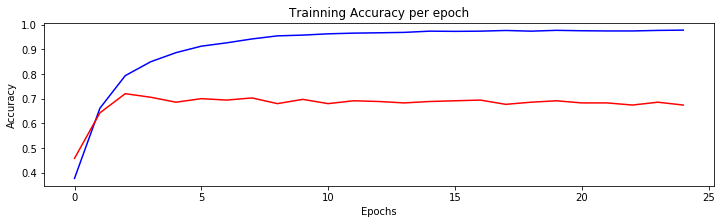

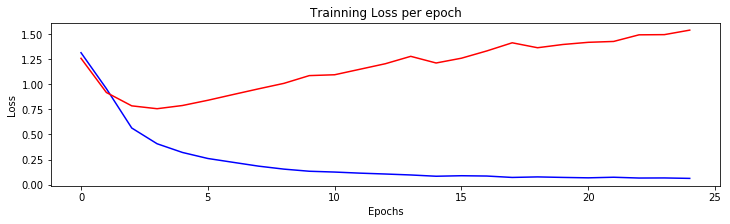

In [16]:
# Answer here
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
# Answer here
import numpy as np
import matplotlib.pyplot as plt 

###accuracy
train_epoch = training_log.epoch.values
train_tacc = training_log.accuracy.values
train_vacc = training_log.val_accuracy.values
train_trloss = training_log.loss.values
train_valoss = training_log.val_loss.values

fig = plt.figure(figsize=(12,3), facecolor='white')


plt.plot(train_epoch, train_tacc, 'b-', label= 'Train_accuracy')
plt.plot(train_epoch, train_vacc, 'r-', label= 'Val_accuracy')
plt.title('Trainning Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

###loss
fig_1 = plt.figure(figsize=(12,3), facecolor='white')
plt.plot(train_epoch, train_trloss, 'b-', label= 'Train_loss')
plt.plot(train_epoch, train_valoss, 'r-', label= 'Val_loss')
plt.title('Trainning Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

---

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


There are several methods as below:
1. We can average the vectors from word2vec, but because loss of word order, it perform poorly.
2. Second, we can combine word vectors in an order by using parse tree of a sentence.
3. And we can also use Doc2Vec, it does not use fixed sentence lengths, and can accept sentences of different lengths for training samples. Overcoming the shortcomings of the word bag model.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [19]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

happy_words:  ['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy', '

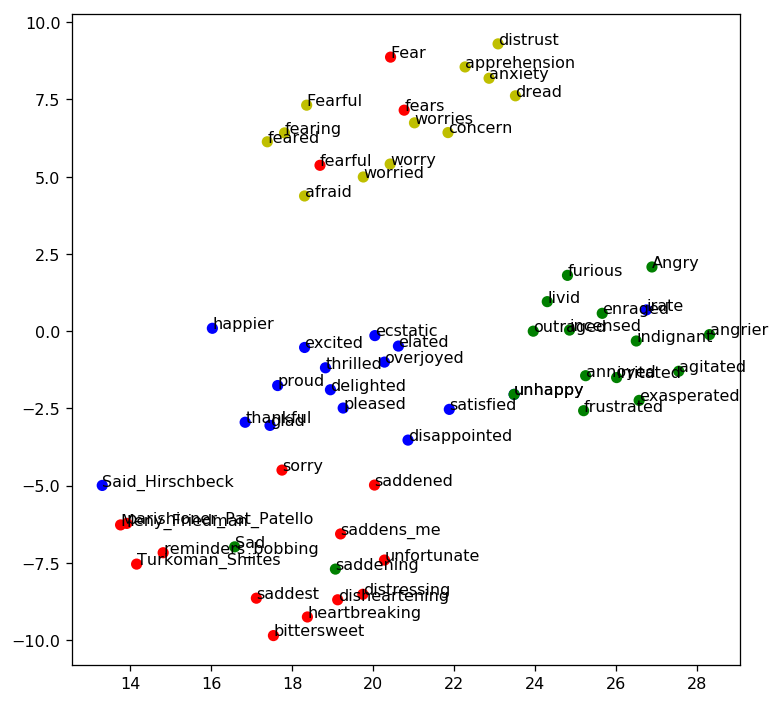

b:angry, g:happy, r:sad, y:fear


In [20]:

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()




print('b:angry, g:happy, r:sad, y:fear')